# Jupyter Notebook for Iris Class
This notebook was made for the easy execution of the Iris classification code. The following code cell represents the design of our LDC class. 

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import os

# LDC CLASS
The following code is the LDC class. 

In [38]:
#The LDC is initialised by the following: 
# - feeding a training set
# - feeding then an r_k list 
# - alpha value
# - number of iterations corresponding to the alpha value
# - list of features.


#Instantiating the class is done as follows, 
#   x = LDC(train, test, t_l, iterations, alpha, list_of_features)
#   We then call a class function called train() to execute the classification: y = x.train()



class LDC:

    def __init__(self, train, test, t_k, iterations, alpha, list_of_features):
        '''
        function init: intialises the class variables. 
        param self: self-referring parameter. Essential to use access class variables and functions. 
        param train: training data.
        param test: test data.
        param t_k: list of all the true labels.
        param iterations: number of iterations.
        param alpha: set of alpha values used in the program.
        param list_of_features: list of features that are used during the LDC.


        '''
        
        
        #class attributes are listed here. The following annotated comments show additional information about the attributes. 

        self.train = train #must be a np.array
        self.test = test #must be a np.array
        self.t_k = t_k #list type has no effect. These are the true labels for the train set. 
        self.iterations = iterations #must be an int
        self.alpha = alpha #list type has no effect. These are the true labels for the train set. 
        self.list_of_features = list_of_features #list type has no effect. These are the true labels for the train set. 
        self.class_names = ['Setosa', 'Versicolor', 'Virginica'] #class names for the program 
        self.features = len(self.list_of_features) +1 #number of features, including the bias.
        self.classes = 3 #class count
        self.weights = np.zeros((self.classes,self.features)) #uses a numpy array to set all the weights to 0. Here we have 3 classes and 5 features.
        self.g_k = np.zeros(self.classes) #sets up array for discriminant values
        self.mses = np.zeros(self.iterations) #sets up array for mse values
        self.confusion_matrix = np.zeros((self.classes,self.classes)) #sets up array for confusion matrix
    
    #the usual get and set functions.
    # -----------------------------------------#   
    def set_iterations(self, iterations):
        self.iterations = iterations
    
    def set_alpha(self, alpha):
        self.alpha = alpha
    
    def set_train(self, train):
        self.train = train

    def set_test(self, test):
        self.test = test
    
    def set_train_test(self,train,test):
        self.train = train
        self.test = test
    
    def set_tk(self, tk):
        self.t_k = tk
    
    def set_list_of_features(self, list_of_features):
        self.list_of_features = list_of_features
    
    def set_num_of_classes(self,classes):
        self.classes = classes

    def get_iterations(self):
        return self.iterations
    
    def get_alpha(self):
        return self.alpha

    def get_train(self):
        return self.train

    def get_test(self):
        return self.test

    def get_train_test(self):
        return self.train, self.test

    def get_weights(self):
        print(self.weights)
        return self.weights

    def get_tk(self):
        return self.t_k

    def get_list_of_features(self):
        return self.list_of_features

    def get_num_of_classes(self):
        return self.classes
    
     # -----------------------------------------#
    #a function to reset the confusion matrix
    def reset_cm(self):
        print('Processing confusion matrix reset to 0.')
        self.confusion_matrix = np.zeros((self.classes,self.classes))

     
    #Implementation of equation 3.20 in the compendium.
    def sigmoid_function(self, x):

        return np.array(1/(1+ np.exp(-x)))

    #Implementation of equation 3.21 in the compendium.
    def grad_gk_mse_f(self, g_k, t_k):

        grad = np.multiply((g_k-t_k),g_k)
        return grad
    

    #calculation the gradient_w z_k, part of eq:3.21 compendium
    def grad_W_zk_f(self, x):

        grad = x.reshape(1,self.features)
        return grad
    #calculation the gradient_W mse, eq:3.22 compendium
    def grad_W_MSE_f(self, g_k, grad_gk_mse, grad_W_zk):

        return np.matmul(np.multiply(grad_gk_mse,(1-g_k)),grad_W_zk)
    #calculation MSE, eq:3.19
    def MSE_f(self, g_k,t_k):

        return 0.5*np.matmul((g_k-t_k).T,(g_k-t_k))


    #training the model
    def train_model(self):
        print(f'The model is now in training with an alpha value of ={self.alpha}. and number of iterations = {self.iterations}.') 
        #setting some init variables.
        self.g_k[0] = 1
        #looping through every iterations
        for i in range(self.iterations):
            #setting start values, and resetting these every iteration
            grad_W_MSE = 0
            MSE = 0
            k = 0 #this is just to know whats the target class is.
            
            for j, x in enumerate(self.train): #isnt really necessary to use enumerate, see if i should change
                if j%30==0 and j!=0:
                    k += 1
                #calculating g_k, eq:3.20 also figure 3.8/3
                self.g_k = self.sigmoid_function(np.matmul(self.weights,x.reshape(self.features,1)))
                #addiing to the MSE, see function
                MSE += self.MSE_f(self.g_k,self.t_k[k])
                #calcultation this iteration of grad gk mse
                grad_gk_mse = self.grad_gk_mse_f(self.g_k,self.t_k[k])
                #calcultation this iteration of grad W zk
                grad_W_zk = self.grad_W_zk_f(x)
                #calcultation this iteration of grad W MSE
                grad_W_MSE += self.grad_W_MSE_f(self.g_k, grad_gk_mse, grad_W_zk)
            #adding the MSE to the list of mses to see the model converge
            self.mses[i] = MSE[0]
            #updating the weights
            self.weights = self.weights-self.alpha*grad_W_MSE

            #printing the progress
            if(100*i /self.iterations) % 10 == 0: 
                
                print(f"\rThe program is now at: {100 * i / self.iterations}%", end='\n')
                
        
        print(f"\rThe program has passed {(i+1)/self.iterations *100}%", end='\n')
        print('Done')
        #returning the weights, this is not necesarry as the self does it automatically
        return self.weights

    #function for testing the model
    def test_model(self): #or call this def fit(), to be simular as other lib.
        #just checking for some wrong inputs
        if(np.all((self.weights==0 ))):
            print('You need to train the model first')
            return False
        if(np.all((self.confusion_matrix != 0))):
            print('You have to reset the confusion matrix first')
            print('Resetting confusion matrix')
            self.reset_cm()

        # if test is None: #used another fix for this
        #     test = self.test
        # else:
        #     print(test)
        #     print('Testing model with training set')
        #     print('Resetting confusion matrix')

            #self.confusion_matrix = np.zeros((self.classes,self.classes))
        print(f'The model is now in testing with an alpha value of ={self.alpha}. and number of iterations = {self.iterations}.') 
        #making predictons by matmul weights and rows in the test set, then adding the prediction and true label too confusion matrix
        for clas, test_set in enumerate(self.test):
            for row in test_set:
                prediction = np.argmax(np.matmul(self.weights,row))
                self.confusion_matrix[clas,prediction] += 1

        return self.confusion_matrix
    #just a function that prints the cm, could have done a nice print. also calculating error rate
    def print_confusion_matrix(self):
        print(self.confusion_matrix)
        dia_sum = 0
        for i in range(len(self.confusion_matrix)):
            dia_sum += self.confusion_matrix[i, i]
        error = 1 - dia_sum / np.sum(self.confusion_matrix)
        print(f'error rate = {100 * error:.1f}%')

    #plotting the confusion matrix, not much to see here
    def plot_confusion_matrix(self, name='ok', save=False):
        dia_sum = 0
        for i in range(len(self.confusion_matrix)):
            dia_sum += self.confusion_matrix[i, i]
        error = 1 - dia_sum / np.sum(self.confusion_matrix)

        df_cm = pd.DataFrame(self.confusion_matrix, index = [i for i in self.class_names],
                  columns = [i for i in self.class_names])
        plt.figure(figsize = (10,7))
        sn.heatmap(df_cm, annot=True, cmap="YlOrRd")
        plt.title(f'Confusion Matrix with the following params: \n iteration: {self.iterations}, alpha: {self.alpha}.\n error rate = {100 * error:.1f}%')
        if save:
            plt.savefig(f'./figurer/confusionmatrixIris_{name}_it{self.iterations}_alpha{self.alpha }.png',dpi=200)
        else:
            plt.show()
        plt.clf()
        plt.close()
    
    #plotting the MSE, not used on less i just have one alpha
    def plot_MSE(self, save=False, log=False):
        plt.plot(self.mses)
        plt.title(f'MSE\n iteration: {self.iterations}, alpha: {self.alpha}.')
        plt.xlabel('Iteration number')
        plt.ylabel('Mean square error (MSE)')
        plt.grid('on')
        if log:
            plt.xscale('log')
        if save:
            plt.savefig(f'mse_it{self.iterations}_alpha{self.alpha}.png',dpi=200)
        else:
            plt.show()
#plotting many alphas and their mse, can see which works best

# PLOTTING FUNCTIONS 


In [39]:

def plot_mses_array(arr, alphas, name='ok', save=False):
    a = 0
    alpha = r'$ \alpha $'
    for i in arr:
        plt.plot(i,label=f'{alpha}={alphas[a]}')
        a += 1

    plt.title('MSE values for all the tests')
    plt.grid('on')
    plt.xlabel('Iteration number')
    plt.ylabel('Mean square error (MSE)')
    plt.legend(loc=1)
    if save:
        plt.savefig(f'./figurer/MSE_all_{name}.png', dpi=200)
    else:
        plt.show()
    plt.clf()
    plt.close()
 

#loading the data to a pandas dataframe. Using pandas as it has a nice visulaztion and is easy to manipulate

def load_data(path, one=True, maxVal=None, normalize=False, d=','): #change normalize to true to normalize the feature data
    data = pd.read_csv(path, sep=d) #reading csv file, and splitting with ","
    #data.columns = ['sepal_length','sepal_width','petal_length','petal_width','species']#making columnnames, for easier understanding
    #data.describe()#this gives all the information you need: count, mean, std, min, 25%, 50%,75%,max
    if one: #dont wont a column of ones when plotting
        lenght = len(data)
        #adding ones
        if lenght>60:

            data.insert(4,'Ones',np.ones(lenght),True)
        
        else:
            data['Ones'] = np.ones(lenght)
    #normalize
    if normalize:
        data = data.divide(maxVal)

    return data

#removing the feature from dataset, this can be a list
def remove_feature_dataset(data, features):
    data = data.drop(columns=features)
    print(data.head())
    return data

#this will filter out the dataframe, not used now but nice to have
def filter_dataset(data,features):
    data = data.filter(items=features)
    return data


# GLOBAL VARIABLES DECLARATION


In [40]:

#-------------global variables---------------#
classes = 3
iris_names = ['Setosa', 'Versicolor', 'Virginica']
#features = ['sepal_length','sepal_width','petal_length','petal_width']
path = 'iris.csv'
path_setosa = 'class_1.csv'
path_versicolour = 'class_2.csv'
path_virginica = 'class_3.csv'

# DATA RETRIEVAL 


In [41]:

tot_data = load_data(path, normalize=False)
max_val = tot_data.max(numeric_only=True).max() #first max, gets max of every feature, second max gets max of the features
setosa = load_data(path_setosa,max_val) 
versicolor = load_data(path_versicolour, max_val)
virginica = load_data(path_virginica, max_val)


# ALpha Value

The following code represents the alpha value. This can be chosen according to the desired value. 

In [42]:
alphas = [0.01]


# Task 1a


In [43]:
def task1a(s=False):
    train_size = 30
    arr= []
    features = ['sepal_length','sepal_width','petal_length','petal_width']
    
    
    #----------------prepros data--------------------#
    #split_data_array = [setosa,versicolor,virginica] #not necessary

    #splitting up in test and train sets
    train = pd.concat([setosa[0:train_size],versicolor[0:train_size],virginica[0:train_size]])
    train_for_test = np.array([setosa[0:train_size],versicolor[0:train_size],virginica[0:train_size]])
    test = np.array([setosa[train_size:],versicolor[train_size:],virginica[train_size:]]) #could mb have done this for train to, 
    t_k = np.array([[[1],[0],[0]],[[0],[1],[0]],[[0],[0],[1]]]) #making array to check whats the true class is
    #just making dataframe to numpy array
    train = train.to_numpy()
    #---------------^prepros data^-------------------#

    for i in range(len(alphas)):
        print(f'Making model with 2000 iteration and an alpha of {alphas[i]} ')
        model = f'w{i}'
        model = LDC(train,test,t_k,2000,alphas[i], features)
        model.train_model()
        model.get_weights()
        arr.append(model.mses)
        model.test_model()
        model.print_confusion_matrix()
        model.plot_confusion_matrix(name='test', save=s)
        print('Testing the model with the training set')
        model.reset_cm()
        model.set_test(train_for_test)
        model.test_model()
        model.print_confusion_matrix()
        model.plot_confusion_matrix(name='train_1a', save=s)
        

    plot_mses_array(arr, alphas, name='test_1a', save=s)



# Task 1d

In [44]:
def task1d(s=False):
    train_size = 20 #still a training size of length 30, but to get the 30 last i use 20 here
    arr = [] #
    features = ['sepal_length','sepal_width','petal_length','petal_width']
   
    #----------------prepros data--------------------#
    #split_data_array = [setosa,versicolor,virginica] #not necessary

    #splitting up in test and train sets
    train = pd.concat([setosa[train_size:],versicolor[train_size:],virginica[train_size:]])
    train_for_test = np.array([setosa[train_size:],versicolor[train_size:],virginica[train_size:]])
    test = np.array([setosa[0:train_size],versicolor[0:train_size],virginica[0:train_size]]) #could mb have done this for train to, 
    t_k = np.array([[[1],[0],[0]],[[0],[1],[0]],[[0],[0],[1]]]) #making array to check whats the true class is
    #just making dataframe to numpy array
    train = train.to_numpy()
    #---------------^prepros data^-------------------#

    for i in range(len(alphas)):
        print(f'Producing a model with 2000 iterations and alpha values of: {alphas[i]} ')
        model = f'wl{i}'
        model = LDC(train,test,t_k,2000,alphas[i], features)
        model.train_model()
        model.get_weights()
        arr.append(model.mses)
        model.test_model()
        model.print_confusion_matrix()
        model.plot_confusion_matrix(name='test', save=s)
        print('Currently training the model with a training set.')
        model.reset_cm()
        model.set_test(train_for_test)
        model.test_model()
        model.print_confusion_matrix()
        model.plot_confusion_matrix(name='train_1d', save=s)
        

    plot_mses_array(arr, alphas, name='test_1d', save=s)


# Task 2a


In [45]:
def task2a(s=False):
    #global setosa,versicolor,virginica
    train_size = 30
    arr = []
    features = ['sepal_length','petal_length','petal_width']
    #removing the sepal width feature because it shows most overlap
    re_feature = ['sepal_width']
    setosa1 = remove_feature_dataset(setosa,re_feature)
    versicolor1 = remove_feature_dataset(versicolor,re_feature)
    virginica1 = remove_feature_dataset(virginica,re_feature)

    #----------------prepros data--------------------#
    #split_data_array = [setosa,versicolor,virginica] #not necessary

    #splitting up in test and train sets
    train = pd.concat([setosa1[0:train_size],versicolor1[0:train_size],virginica1[0:train_size]])
    train_for_test = np.array([setosa1[0:train_size],versicolor1[0:train_size],virginica1[0:train_size]])
    test = np.array([setosa1[train_size:],versicolor1[train_size:],virginica1[train_size:]]) #could mb have done this for train to, 
    t_k = np.array([[[1],[0],[0]],[[0],[1],[0]],[[0],[0],[1]]]) #making array to check whats the true class is
    #just making dataframe to numpy array
    train = train.to_numpy()
    #---------------^prepros data^-------------------#
    for i in range(len(alphas)):
        print(f'Producing a model with 2000 iterations and alpha values of: {alphas[i]} ')
        model = f'w2{i}'
        model = LDC(train,test,t_k,2000,alphas[i], features)
        model.train_model()
        model.get_weights()
        arr.append(model.mses)
        model.test_model()
        model.print_confusion_matrix()
        model.plot_confusion_matrix(name='test_2a', save=s)
        print('Currently training the model with a training set.')
        model.reset_cm()
        model.set_test(train_for_test)
        model.test_model()
        model.print_confusion_matrix()
        model.plot_confusion_matrix(name='train_2a', save=s)
        

    plot_mses_array(arr, alphas, name='test_2a', save=s)


# Task 2b - 1


In [46]:
def task2b_1(s=False):
    #also removing sepal length since it also showed alot of overlap
    #global setosa,versicolor,virginica
    train_size = 30
    arr = []
    features = ['petal_length','petal_width']
    #removing the sepal width feature because it shows most overlap
    re_feature = ['sepal_length','sepal_width']
    setosa2 = remove_feature_dataset(setosa,re_feature)
    versicolor2 = remove_feature_dataset(versicolor,re_feature)
    virginica2 = remove_feature_dataset(virginica,re_feature)

    #----------------prepros data--------------------#
    #split_data_array = [setosa,versicolor,virginica] #not necessary

    #splitting up in test and train sets
    train = pd.concat([setosa2[0:train_size],versicolor2[0:train_size],virginica2[0:train_size]])
    train_for_test = np.array([setosa2[0:train_size],versicolor2[0:train_size],virginica2[0:train_size]])
    test = np.array([setosa2[train_size:],versicolor2[train_size:],virginica2[train_size:]]) #could mb have done this for train to, 
    t_k = np.array([[[1],[0],[0]],[[0],[1],[0]],[[0],[0],[1]]]) #making array to check whats the true class is
    #just making dataframe to numpy array
    train = train.to_numpy()
    #---------------^prepros data^-------------------#
    for i in range(len(alphas)):
        print(f'Producing a model with 2000 iterations and alpha values of: {alphas[i]} ')
        model = f'w2{i}'
        model = LDC(train,test,t_k,2000,alphas[i], features)
        model.train_model()
        arr.append(model.mses)
        model.test_model()
        model.print_confusion_matrix()
        model.plot_confusion_matrix(name='test_2b1', save=s)
        print('Currently training the model with a training set.')
        model.reset_cm()
        model.set_test(train_for_test)
        model.test_model()
        model.print_confusion_matrix()
        model.plot_confusion_matrix(name='train_2b1', save=s)
        

    plot_mses_array(arr, alphas, name='test_2b1', save=s)


# Task 2b-2

In [47]:
def task2b_2(s=False):
    #also removing petal width
    #global setosa,versicolor,virginica
    train_size = 30
    arr = []
    features = ['petal_length']
    #removing the sepal width feature because it shows most overlap
    re_feature = ['sepal_length','sepal_width','petal_width']
    setosa3 = remove_feature_dataset(setosa,re_feature)
    versicolor3 = remove_feature_dataset(versicolor,re_feature)
    virginica3 = remove_feature_dataset(virginica,re_feature)

    #----------------prepros data--------------------#
    #split_data_array = [setosa,versicolor,virginica] #not necessary

    #splitting up in test and train sets
    train = pd.concat([setosa3[0:train_size],versicolor3[0:train_size],virginica3[0:train_size]])
    train_for_test = np.array([setosa3[0:train_size],versicolor3[0:train_size],virginica3[0:train_size]])
    test = np.array([setosa3[train_size:],versicolor3[train_size:],virginica3[train_size:]]) #could mb have done this for train to, 
    t_k = np.array([[[1],[0],[0]],[[0],[1],[0]],[[0],[0],[1]]]) #making array to check whats the true class is
    #just making dataframe to numpy array
    train = train.to_numpy()
    #---------------^prepros data^-------------------#
    for i in range(len(alphas)):
        print(f'Producing a model with 2000 iterations and alpha values of: {alphas[i]} ')
        model = f'w3{i}'
        model = LDC(train,test,t_k,2000,alphas[i], features)
        model.train_model()
        arr.append(model.mses)
        model.test_model()
        model.print_confusion_matrix()
        model.plot_confusion_matrix(name='test_2b2', save=s)
        print('Currently training the model with a training set.')
        model.reset_cm()
        model.set_test(train_for_test)
        model.test_model()
        model.print_confusion_matrix()
        model.plot_confusion_matrix(name='train_2b2', save=s)
        

    plot_mses_array(arr, alphas, name='test_2b2', save=s)


# Task 2b-2-1


In [48]:
def task2b_2_1(s=False):
    #Testing with removing petal length
    #global setosa,versicolor,virginica, not nice solution

    train_size = 30
    arr = []
    features = ['petal_width']
    #removing the sepal width feature because it shows most overlap
    re_feature = ['sepal_length','sepal_width','petal_length']
    setosa4 = remove_feature_dataset(setosa,re_feature)
    versicolor4 = remove_feature_dataset(versicolor,re_feature)
    virginica4 = remove_feature_dataset(virginica,re_feature)

    #----------------prepros data--------------------#
    #split_data_array = [setosa,versicolor,virginica] #not necessary

    #splitting up in test and train sets
    train = pd.concat([setosa4[0:train_size],versicolor4[0:train_size],virginica4[0:train_size]])
    train_for_test = np.array([setosa4[0:train_size],versicolor4[0:train_size],virginica4[0:train_size]])
    test = np.array([setosa4[train_size:],versicolor4[train_size:],virginica4[train_size:]]) #could mb have done this for train to, 
    t_k = np.array([[[1],[0],[0]],[[0],[1],[0]],[[0],[0],[1]]]) #making array to check whats the true class is
    #just making dataframe to numpy array
    train = train.to_numpy()
    #---------------^prepros data^-------------------#
    for i in range(len(alphas)):
        print(f'Producing a model with 2000 iterations and alpha values of: {alphas[i]} ')
        model = f'w4{i}'
        model = LDC(train,test,t_k,2000,alphas[i], features)
        model.train_model()
        arr.append(model.mses)
        model.test_model()
        model.print_confusion_matrix()
        model.plot_confusion_matrix(name='test_2b2_1', save=s)
        print('Currently training the model with a training set.')
        model.reset_cm()
        model.set_test(train_for_test)
        model.test_model()
        model.print_confusion_matrix()
        model.plot_confusion_matrix(name='train_2b2_1', save=s)
        

    plot_mses_array(arr, alphas, name='test_2b2_1', save=s)


# RUN FROM HERE
Run all cells from the below python cell in order to initialise the Jupyter notebook. After that, one can then simply run any cell below in any order. 

Making model with 2000 iteration and an alpha of 0.01 
The model is now in training with an alpha value of =0.01. and number of iterations = 2000.
The program is now at: 0.0%
The program is now at: 10.0%
The program is now at: 20.0%
The program is now at: 30.0%
The program is now at: 40.0%
The program is now at: 50.0%
The program is now at: 60.0%
The program is now at: 70.0%
The program is now at: 80.0%
The program is now at: 90.0%
The program has passed 100.0%
Done
[[ 0.42824382  1.67999442 -2.50046027 -1.15753733  0.30351656]
 [ 1.47200709 -2.91796407 -0.19449539 -1.16621896  1.59321638]
 [-2.95381208 -2.49268087  4.31438566  3.76207286 -1.88782971]]
The model is now in testing with an alpha value of =0.01. and number of iterations = 2000.
[[20.  0.  0.]
 [ 0. 18.  2.]
 [ 0.  0. 20.]]
error rate = 3.3%


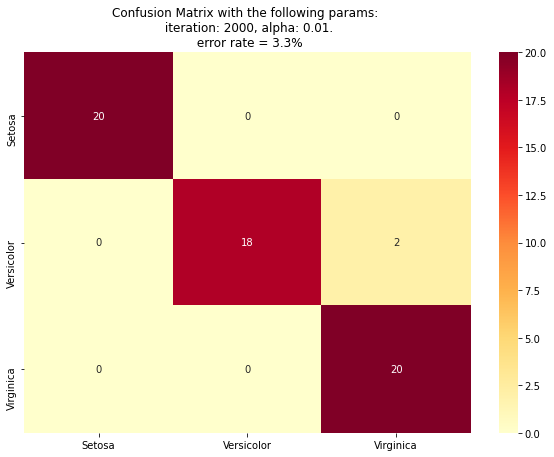

Testing the model with the training set
Processing confusion matrix reset to 0.
The model is now in testing with an alpha value of =0.01. and number of iterations = 2000.
[[30.  0.  0.]
 [ 0. 28.  2.]
 [ 0.  1. 29.]]
error rate = 3.3%


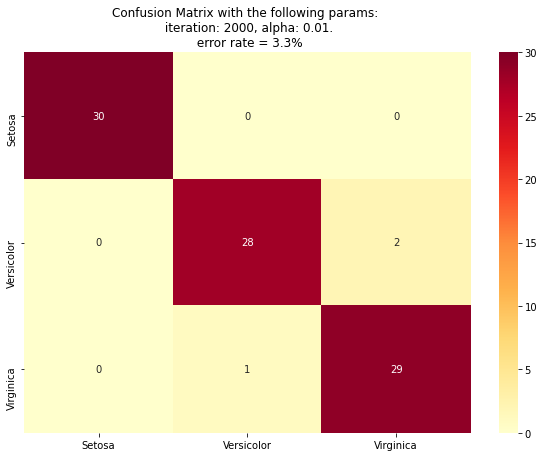

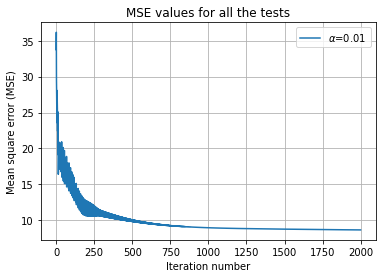

In [49]:
#Runtime code. Run all cells above, then run any cell below.
task1a()


Producing a model with 2000 iterations and alpha values of: 0.01 
The model is now in training with an alpha value of =0.01. and number of iterations = 2000.
The program is now at: 0.0%
The program is now at: 10.0%
The program is now at: 20.0%
The program is now at: 30.0%
The program is now at: 40.0%
The program is now at: 50.0%
The program is now at: 60.0%
The program is now at: 70.0%
The program is now at: 80.0%
The program is now at: 90.0%
The program has passed 100.0%
Done
[[ 0.49357303  1.68088382 -2.64163951 -1.23381038  0.30990399]
 [ 0.29288795 -2.31739773  1.57800817 -3.60261158  3.00411654]
 [-2.16253441 -2.92182074  3.55921373  4.26332276 -2.45273946]]
The model is now in testing with an alpha value of =0.01. and number of iterations = 2000.
[[20.  0.  0.]
 [ 0. 20.  0.]
 [ 0.  0. 20.]]
error rate = 0.0%


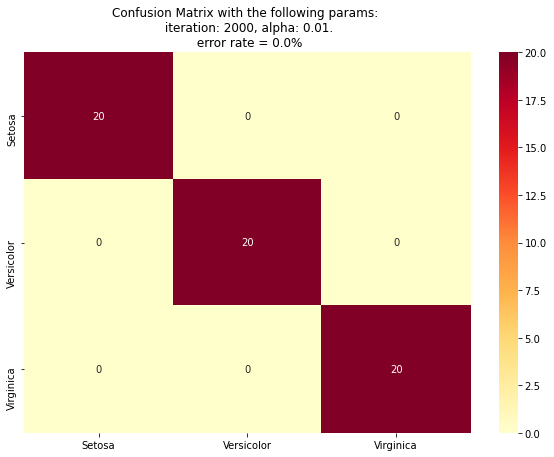

Currently training the model with a training set.
Processing confusion matrix reset to 0.
The model is now in testing with an alpha value of =0.01. and number of iterations = 2000.
[[30.  0.  0.]
 [ 0. 27.  3.]
 [ 0.  2. 28.]]
error rate = 5.6%


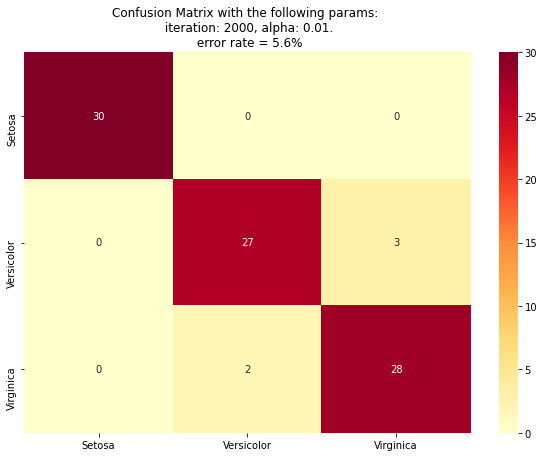

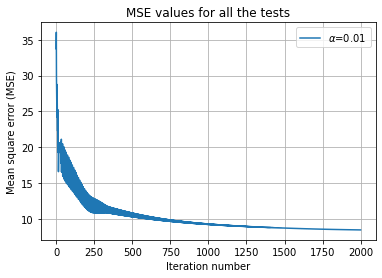

In [50]:
task1d()

   sepal_length  petal_length  petal_width  Ones
0           5.1           1.4          0.2   1.0
1           4.9           1.4          0.2   1.0
2           4.7           1.3          0.2   1.0
3           4.6           1.5          0.2   1.0
4           5.0           1.4          0.2   1.0
   sepal_length  petal_length  petal_width  Ones
0           7.0           4.7          1.4   1.0
1           6.4           4.5          1.5   1.0
2           6.9           4.9          1.5   1.0
3           5.5           4.0          1.3   1.0
4           6.5           4.6          1.5   1.0
   sepal_length  petal_length  petal_width  Ones
0           6.3           6.0          2.5   1.0
1           5.8           5.1          1.9   1.0
2           7.1           5.9          2.1   1.0
3           6.3           5.6          1.8   1.0
4           6.5           5.8          2.2   1.0
Producing a model with 2000 iterations and alpha values of: 0.01 
The model is now in training with an alpha value of 

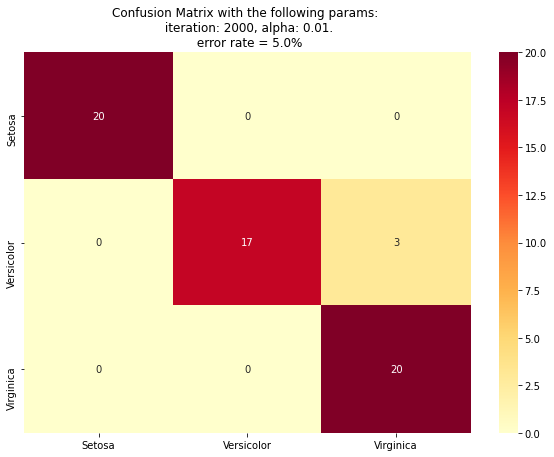

Currently training the model with a training set.
Processing confusion matrix reset to 0.
The model is now in testing with an alpha value of =0.01. and number of iterations = 2000.
[[30.  0.  0.]
 [ 0. 28.  2.]
 [ 0.  1. 29.]]
error rate = 3.3%


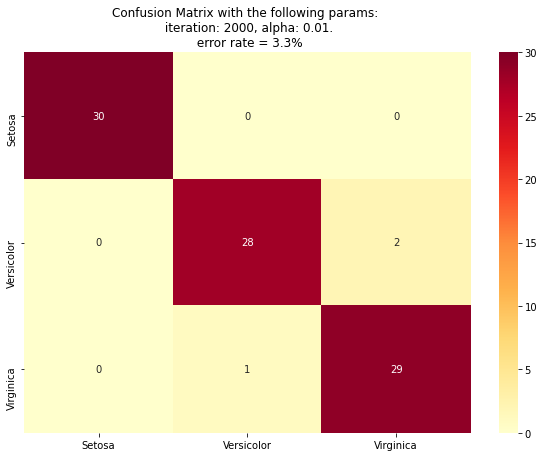

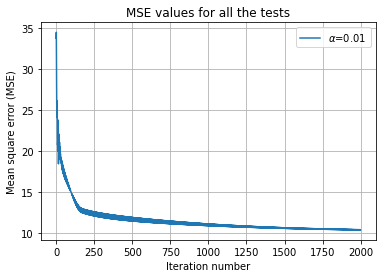

In [51]:
task2a()

   petal_length  petal_width  Ones
0           1.4          0.2   1.0
1           1.4          0.2   1.0
2           1.3          0.2   1.0
3           1.5          0.2   1.0
4           1.4          0.2   1.0
   petal_length  petal_width  Ones
0           4.7          1.4   1.0
1           4.5          1.5   1.0
2           4.9          1.5   1.0
3           4.0          1.3   1.0
4           4.6          1.5   1.0
   petal_length  petal_width  Ones
0           6.0          2.5   1.0
1           5.1          1.9   1.0
2           5.9          2.1   1.0
3           5.6          1.8   1.0
4           5.8          2.2   1.0
Producing a model with 2000 iterations and alpha values of: 0.01 
The model is now in training with an alpha value of =0.01. and number of iterations = 2000.
The program is now at: 0.0%
The program is now at: 10.0%
The program is now at: 20.0%
The program is now at: 30.0%
The program is now at: 40.0%
The program is now at: 50.0%
The program is now at: 60.0%
The progra

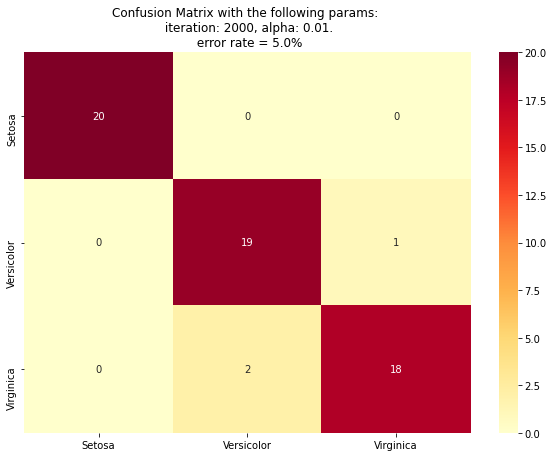

Currently training the model with a training set.
Processing confusion matrix reset to 0.
The model is now in testing with an alpha value of =0.01. and number of iterations = 2000.
[[30.  0.  0.]
 [ 0. 26.  4.]
 [ 0.  2. 28.]]
error rate = 6.7%


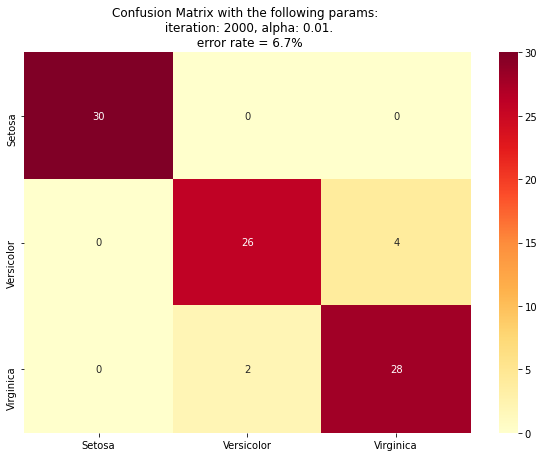

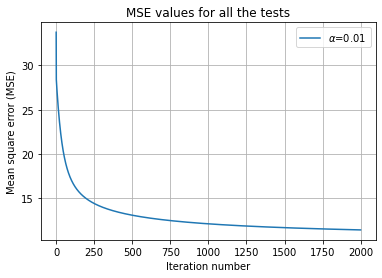

In [52]:
task2b_1()

   petal_length  Ones
0           1.4   1.0
1           1.4   1.0
2           1.3   1.0
3           1.5   1.0
4           1.4   1.0
   petal_length  Ones
0           4.7   1.0
1           4.5   1.0
2           4.9   1.0
3           4.0   1.0
4           4.6   1.0
   petal_length  Ones
0           6.0   1.0
1           5.1   1.0
2           5.9   1.0
3           5.6   1.0
4           5.8   1.0
Producing a model with 2000 iterations and alpha values of: 0.01 
The model is now in training with an alpha value of =0.01. and number of iterations = 2000.
The program is now at: 0.0%
The program is now at: 10.0%
The program is now at: 20.0%
The program is now at: 30.0%
The program is now at: 40.0%
The program is now at: 50.0%
The program is now at: 60.0%
The program is now at: 70.0%
The program is now at: 80.0%
The program is now at: 90.0%
The program has passed 100.0%
Done
The model is now in testing with an alpha value of =0.01. and number of iterations = 2000.
[[20.  0.  0.]
 [ 0. 18.  2.]
 

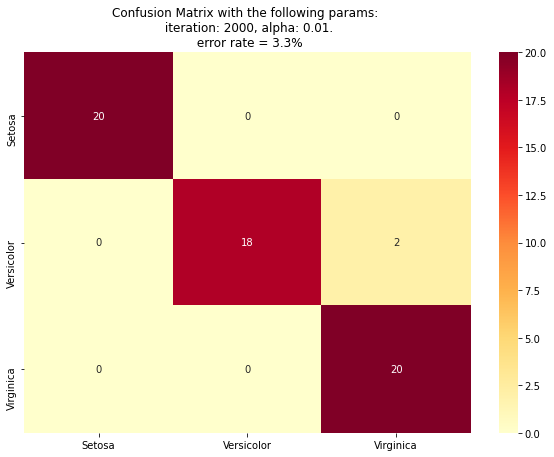

Currently training the model with a training set.
Processing confusion matrix reset to 0.
The model is now in testing with an alpha value of =0.01. and number of iterations = 2000.
[[30.  0.  0.]
 [ 0. 21.  9.]
 [ 0.  1. 29.]]
error rate = 11.1%


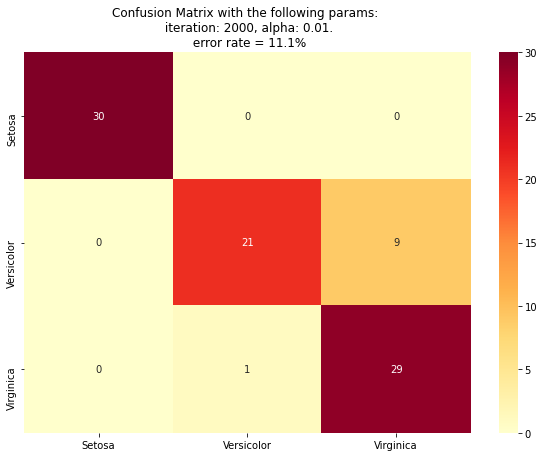

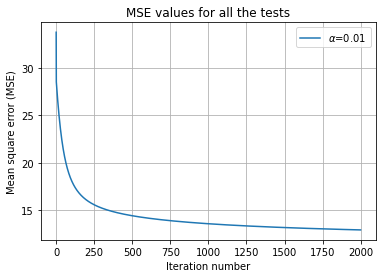

In [53]:
task2b_2()

   petal_width  Ones
0          0.2   1.0
1          0.2   1.0
2          0.2   1.0
3          0.2   1.0
4          0.2   1.0
   petal_width  Ones
0          1.4   1.0
1          1.5   1.0
2          1.5   1.0
3          1.3   1.0
4          1.5   1.0
   petal_width  Ones
0          2.5   1.0
1          1.9   1.0
2          2.1   1.0
3          1.8   1.0
4          2.2   1.0
Producing a model with 2000 iterations and alpha values of: 0.01 
The model is now in training with an alpha value of =0.01. and number of iterations = 2000.
The program is now at: 0.0%
The program is now at: 10.0%
The program is now at: 20.0%
The program is now at: 30.0%
The program is now at: 40.0%
The program is now at: 50.0%
The program is now at: 60.0%
The program is now at: 70.0%
The program is now at: 80.0%
The program is now at: 90.0%
The program has passed 100.0%
Done
The model is now in testing with an alpha value of =0.01. and number of iterations = 2000.
[[20.  0.  0.]
 [ 0. 18.  2.]
 [ 0.  2. 18.]]
err

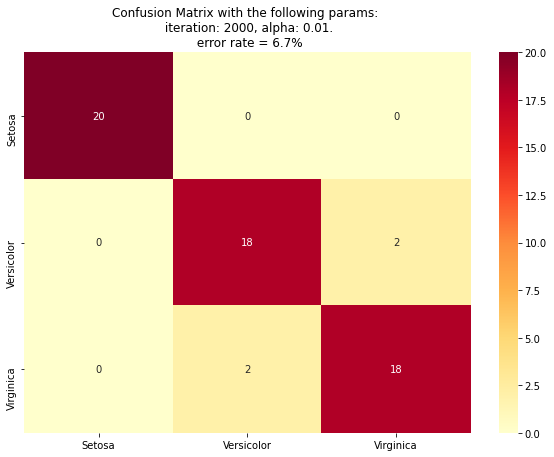

Currently training the model with a training set.
Processing confusion matrix reset to 0.
The model is now in testing with an alpha value of =0.01. and number of iterations = 2000.
[[30.  0.  0.]
 [ 0. 27.  3.]
 [ 0.  1. 29.]]
error rate = 4.4%


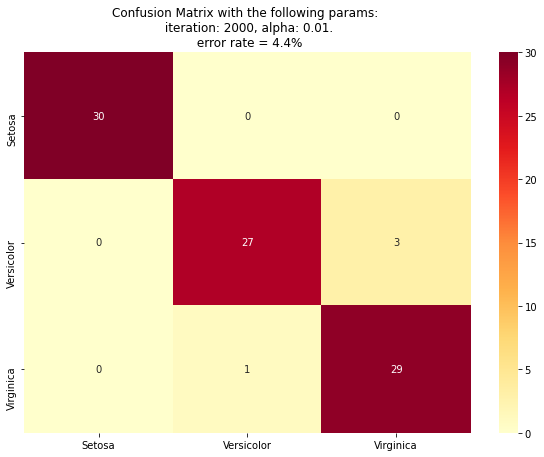

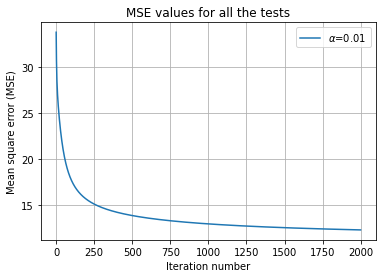

In [54]:
task2b_2_1()